# What is the likelihood?

So far we have looked at how we can define, and reparameterise, our model. 
Now, we should consider how we **compare** our model to some experimental data. 
The broad aim of *fitting* is to get the model data to agree as best as is possible to the experimental data.
Here, we discuss fitting in terms of the maximisation of likelihood, this is analogous to the [minimisation](https://en.wikipedia.org/wiki/Minimum_chi-square_estimation) of a $\chi^2$ goodness-of-fit metric:

$$
\chi^2 = \sum_{n=1}^{n_{\mathrm{max}}}\bigg\{\frac{[y_n - \mathrm{M}(x_n)] ^ 2}{\sigma_n ^ 2}\bigg\}
$$

summing over each of the datapoints. This $\chi^2$ is strongly related to the log-likelihood which will be discussed in the next section. Many other alternatives for figures of merit exist, which may be used in other situations, for example if the data points to not have associated error bars. One such figure of merit commonly used in x-ray reflectometry fitting is the log difference
$$
\textrm{Log FOM} = \sum_{n=1}^{n_{\mathrm{max}}}|\log y_n - \log\mathrm{M}(x_n)|
$$
This is often used in order to emphasize higher-Q data points. Figures of merit also exist for linear or square-root difference, which are less frequently used.

The likelihood, $\mathcal{L}(\theta|y)$, is a measure of the agreement between the model, which depends on parameters $\theta$, given some data, $y$.
If we consider some values for $y$, which increase linearly with $x$ and have associated with them some value for $\sigma$, the uncertainty in $y$. 
Typically, we plot these uncertainties as **error bars** on our data. 
However, these uncertainties typically indicate a single standard deviation for the underlying probability distribution that the observed values of $y$ are selected from. 
This is represented by the blue points and error bars and probability distributions shown in the figure below.

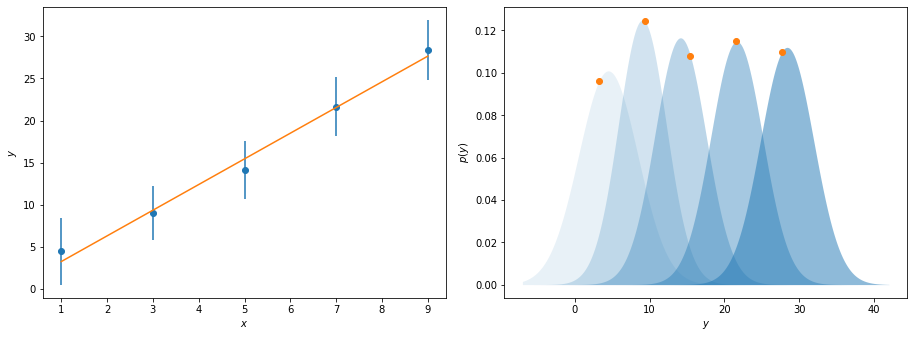

(3.0496667614679125, 0.20384101638663543)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

def straight_line(x: np.ndarray, m:float, c:float) -> np.ndarray:
    """
    :param x: the abscissa data
    :param m: gradient of line
    :param c: intercept
    :returns: model values
    """
    return m * x + c

x, y, sigma = np.loadtxt('data.txt')
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
m, c = curve_fit(straight_line, x, y, sigma=sigma)[0]
ax[0].errorbar(x, y, sigma, marker='o', ls='')
ax[0].plot(x, straight_line(x, m, c), ls='-', zorder=10)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
yy = np.linspace(-7, 42, 1000)
y_fit = straight_line(x, m, c)
for i, d in enumerate(y):
    ax[1].fill_between(yy, 0, norm(d, sigma[i]).pdf(yy), alpha=(i + 1) * 0.1, color='#1f77b4', lw=0)
    ax[1].plot(y_fit[i], norm(d, sigma[i]).pdf(y_fit[i]), marker='o', color='#ff7f0e')
ax[1].set_ylabel('$p(y)$')
ax[1].set_xlabel('$y$')
plt.tight_layout()
plt.show()
m, c

When we perform model-dependent analysis, we aim to find the parameters for some model that find the overall maximum for these probability distributions. 
This can be seen for the *line of best fit* to the data above, where the orange dots show where on these probability distributions this maximum likelihood model sits. 
For data where the uncertainty represents a single standard deviation on a normal distribution, it is possible to calculate the likelihood, or as is done more commonly the log-likelihood, for a given model, $\mathrm{M}$, with the following, 

$$
\ln[\mathcal{L}(\theta | y)] = -\frac{1}{2}\sum_{n=1}^{n_{\mathrm{max}}}\bigg\{\frac{[y_n - \mathrm{M}(x_n, \theta)] ^ 2}{\sigma_n ^ 2} + \ln(2\pi \sigma_n  ^ 2)\bigg\},
$$

where $n_{\mathrm{max}}$ is the number of datapoints. 
You may notice that the first part of the summation is the same as a typical $\chi^2$ goodness-of-fit metric that one may minimise, with the other elements being normalisation factors. 
For data where the uncertainty is not normally distributed, other likelihood functions may be used, however, the majority of reflectometry analysis considers normal uncertainties.

````{margin}
```{note}
If your counts are low (or for example comparable to the background), the Poisson distribution is not well-described by a normal distribution
```
````

The value of a likelihood (and any goodness of fit metric) depends heavily on the data that it is describing. 
Hence, the likelihood is written $\mathcal{L}(\theta | y)$, where the $|y$ indicates that this is given some data $y$. 
This means that **one cannot compare likelihood values across datasets**, it is only possible to compare likelihood values across models for a single dataset.